# GCC118 - Programação Matemática
## Prof. Mayron César de O. Moreira
### Programação Linear: Modelagem Matemática

- *Universidade Federal de Lavras*  
- *Departamento de Ciência da Computação*  

## Problema da Ração

Uma agroindúsria deve produzir um tipo de ração para um determinado animal. Essa ração possui três ingredientes básicos: osso, soja e restos de peixe. Cada um desses três ingredientes contém diferentes quantidades de proteína e cálcio (para 1 Kg de ração).

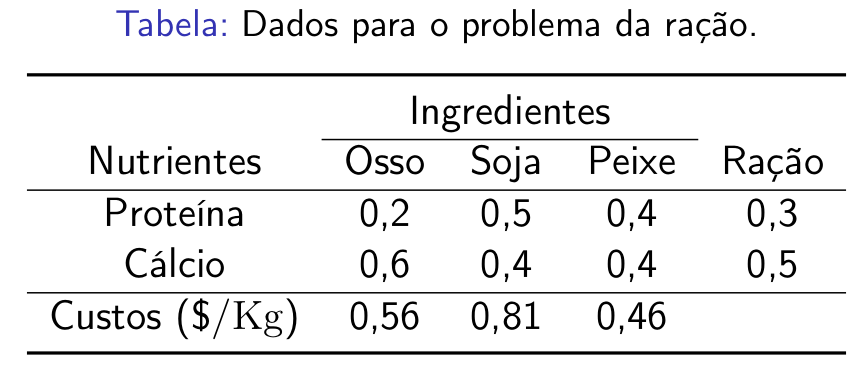

In [1]:
from IPython.display import Image
Image(filename='./images/Tabela_Racao.png', width=500, height=500)

**Objetivo**: Determinar em que quantidades devem ser misturados de modo a produzir uma ração que satisfaça às restrições nutricionais com *custo mínimo*.

### Parâmetros

- $I=\{Osso, Soja, Peixe\}$: conjunto de ingredientes;
- $N=\{Proteina, Calcio\}$: conjunto de nutrientes;
- $a_{ij}$: porção do nutriente $j \in N$ no ingrediente $i \in I$;
- $c_{i}$: custo (em $\$$/g) do ingrediente $i \in I$;
- $b_j$: quantidade (em gramas) desejável do nutriente $j\in N$.

Em Python, estes parâmetros são declarados da seguinte forma:

In [1]:
from gurobipy import * # Biblioteca que resolverá o modelo formulado

# Conjunto de ingredientes
I = ['Osso', 'Soja', 'Peixe']

# Conjunto de nutrientes
N = ['Proteina', 'Calcio']

# Porção dos nutrientes nos ingredientes
a = {
    ('Osso','Proteina'): 0.2,
    ('Osso','Calcio'): 0.6,
    ('Soja','Proteina'): 0.5,
    ('Soja','Calcio'): 0.4,
    ('Peixe','Proteina'): 0.4,
    ('Peixe','Calcio'): 0.4
}

# Custo dos ingredientes
c = {
    'Osso': 0.56,
    'Soja': 0.81,
    'Peixe': 0.46
}

# Quantidade desejável dos nutrientes
b = {
    'Proteina': 0.3,
    'Calcio': 0.5
}

### Cria o modelo

In [2]:
from gurobipy import * # Biblioteca que resolverá o modelo formulado

# Cria o Modelo
m = Model("Problema da Ração")

Academic license - for non-commercial use only


### Variáveis

- $x_i \ge 0$: quantidade, em gramas, do ingrediente $i \in I$.

In [3]:
# x_i >= 0, continua (real)
x = m.addVars(I, vtype=GRB.CONTINUOUS, lb=0, ub=GRB.INFINITY, name="x")

### Função objetivo

*Minimiza o custo total da ração*
\begin{equation}
\mbox{min } f(x) = \sum_{i \in I} c_ix_i
\end{equation}

In [4]:
# Implementação da função objetivo
m.setObjective(sum(c[i]*x[i] for i in I), GRB.MINIMIZE)

### Restrições

- *Quantidade mínima de Proteína e Cálcio*
\begin{equation}
\sum_{i \in I}a_{ij}x_i \ge b_j, \forall j \in N
\end{equation}

- *Determinação do total da ração: 1Kg*
\begin{equation}
\sum_{i \in I}x_i  = 1
\end{equation}

In [6]:
m.addConstrs((sum(a[i,j]*x[i] for i in I) >= b[j] for j in N), "Restricao_Nutri")
    
m.addConstr(sum(x[i] for i in I) == 1, "Restrição_Qtde_Racao")

<gurobi.Constr *Awaiting Model Update*>

### Resolve o modelo e imprime solução

In [7]:
m.optimize()

if m.status == GRB.Status.OPTIMAL:
    m.printAttr('X')
    
else:
    print("Modelo finalizado com status %d" % m.status)

Optimize a model with 6 rows, 3 columns and 18 nonzeros
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [5e-01, 8e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e-01, 1e+00]
Presolve removed 3 rows and 0 columns
Presolve time: 0.02s
Presolved: 3 rows, 3 columns, 9 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.6000000e-01   1.000000e-01   0.000000e+00      0s
       1    5.1000000e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.05 seconds
Optimal objective  5.100000000e-01

    Variable            X 
-------------------------
     x[Osso]          0.5 
    x[Peixe]          0.5 
